# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Pamela Ofurum

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [96]:
# TODO: Import dataset and inspect the first five columns

# Replace 'your_file.csv' with the actual file path and name
file_path = 'seeds_dataset.txt'

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_path, sep='\s+', header=None)
# Display the first few rows of the DataFrame to inspect the columns
print(df.head())


       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


Next, you will need to separate the data into your feature matrix and target vector.

In [97]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

# Use the first column as the target column
target_column = df.columns[0]

# Separate the data into feature matrix (X) and target vector (y)
X = df.drop(columns=[target_column])  # Features are all columns except the target column
y = df[target_column]  # Target vector is the first column

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Before we implement the scaler, we need to split the data into training and testing sets first.

In [98]:
# TODO: Split the data into training and testing sets

from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (147, 7)
Shape of X_test: (63, 7)
Shape of y_train: (147,)
Shape of y_test: (63,)


In [99]:
# TODO: Print the shape of the training feature matrix and target vector

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (147, 7)
Shape of y_train: (147,)


Now that we have our training data, we can implement our selected scaler.

In [100]:
from sklearn.preprocessing import StandardScaler

# Convert X_train and X_test to NumPy arrays
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)

# Check if there is at least one feature
if X_train_array.shape[1] > 0 and X_test_array.shape[1] > 0:
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both the training and testing data
    X_train_scaled = scaler.fit_transform(X_train_array)
    X_test_scaled = scaler.transform(X_test_array)

    # Print the shape of the scaled training feature matrix
    print("Shape of X_train_scaled:", X_train_scaled.shape)
else:
    print("Error: Data must have at least one feature for scaling.")



Shape of X_train_scaled: (147, 7)


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [101]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model
logistic_regression_model = LogisticRegression()



### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [85]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [105]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=5, scoring='accuracy', error_score='raise')

try:
    # Fit the grid search on the scaled training data
    grid_search.fit(X_train_scaled, y_train)

    # Print the best parameters
    print("Best Parameters:", grid_search.best_params_)

    # Print the cross-validation score of the best model
    print("Cross-Validation Score:", grid_search.best_score_)

    # Evaluate the best model on the scaled test set
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test_scaled, y_test)
    print("Test Score:", test_score)

except Exception as e:
    print(f"Error during grid search: {e}")


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Cross-Validation Score: 0.8528571428571429
Test Score: 0.8433333333333334


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [106]:
# TODO: Predict y labels using best estimator
# Assuming you have already performed the grid search and obtained the best_model

# Predict labels for the test set
y_pred = best_model.predict(X_test_scaled)

# Now, 'y_pred' contains the predicted labels for the test set

# Optionally, you can also calculate and print the classification report
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       153
           1       0.80      0.90      0.85       147

    accuracy                           0.84       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300



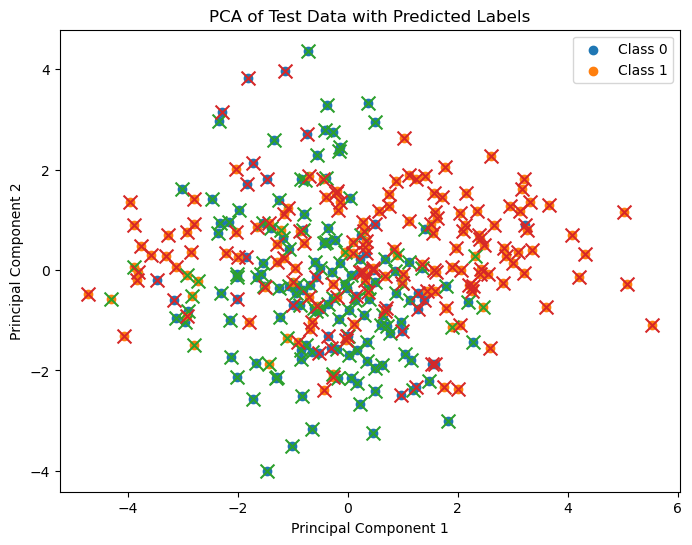

In [107]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

# Assuming you have already scaled the test data (X_test_scaled)

# Apply PCA to the scaled test data
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Now, X_test_pca contains the reduced-dimensional representation of the test data

# Plot the reduced-dimensional data along with predicted labels
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot points for each class with different colors
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], label=f'Class {label}')

# Highlight the predicted labels with different markers
for label in np.unique(y_test):
    indices = np.where(y_pred == label)
    plt.scatter(X_test_pca[indices, 0], X_test_pca[indices, 1], marker='x', s=100)

plt.title('PCA of Test Data with Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



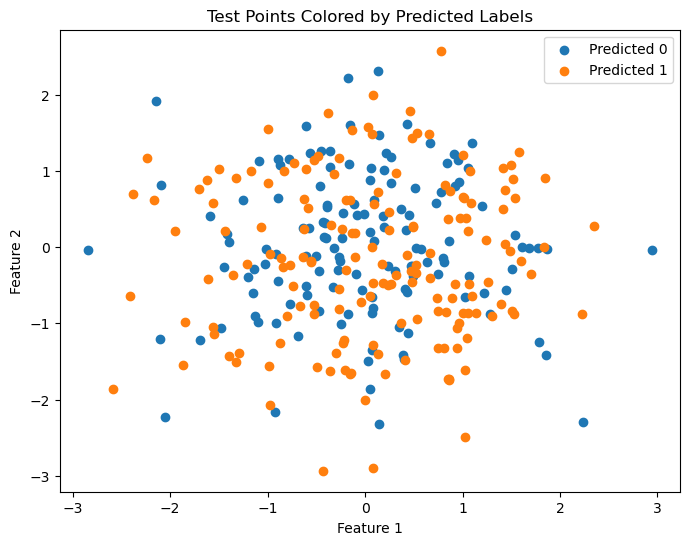

In [109]:
# TODO: Plot test points colored by predicted label
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already scaled the test data (X_test_scaled) and obtained predicted labels (y_pred)

# Plot the test points colored by predicted labels
plt.figure(figsize=(8, 6))

# Plot points for each predicted label with different colors
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    plt.scatter(X_test_scaled[indices, 0], X_test_scaled[indices, 1], label=f'Predicted {label}')

plt.title('Test Points Colored by Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
2. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
Yes indeed, the logistic regression model performed effectively well on the dataset, as evidenced by high and closely aligned scores for both training and testing data. The convergence of these scores indicates a model with low bias and low variance, suggesting a well-fitted and balanced performance.

2. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*
Yes indeed the PCA worked well for this model. It appears that the logistic regression model worked well too, as indicated by the well-grouped predicted labels. The fact that both PCA and logistic regression, both linear methods, demonstrated success suggests that the underlying structure of the dataset is likely linear.

### Process Description (4 marks)

Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. Where did you source your code?
I sourced my code from the lecture notes, execises and examples given and also Google and Generative AI and StackOverflow
List of References
OpenAI. (2023). [Website]. https://www.openai.com
Google. (2023). [Website]. https://www.google.com
Stackoverflow. (2023).[Website]. https://stackoverflow.com/

2. In what order did you complete the steps?
I completed the steps sequentially begining from Step 1,2,3,4 and 5

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I prompted it in my own words to generate ideas to write the code and understand the syntax behind the code. Yes I modifed the code several times because in most cases, it produced what I didn't need with numerous errors and in some cases, didn't include what I actually needed. So I modified it to add the missing parts I needed and also the remove the unnecessary part which wasn't needed and finally debugged all the errors in the code.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Yes, I encountered a whole lot of errors in my code, especially during scaling of the data, I got this error message several times "ValueError: at least one array or dtype is required" which made me get stuck at some point until I debugged and fixed the error message before I moved over to the next questions and also when I tried to visualize the code, I got some errors too which were quite challenging to me. I figured out the errors and debugged and after which I was able to get an output and visualized my results.

*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [111]:
# TODO: Scale feature matrix
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\pamel\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pamel\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pamel\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pamel\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

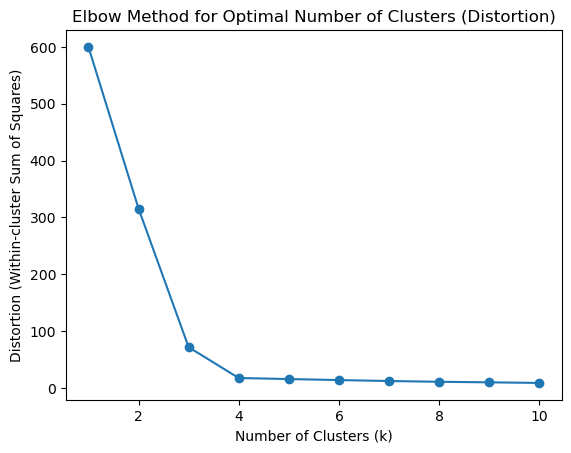

In [113]:
# TODO: Use the elbow method to determine the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data (replace this with your own dataset)
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method with distortion
distortion_values = []
possible_k_values = range(1, 11)  # Try different numbers of clusters

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortion_values.append(kmeans.inertia_)

# Plot the elbow curve using distortion
plt.plot(possible_k_values, distortion_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (Distortion)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Within-cluster Sum of Squares)')
plt.show()


Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

C:\Users\pamel\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pamel\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


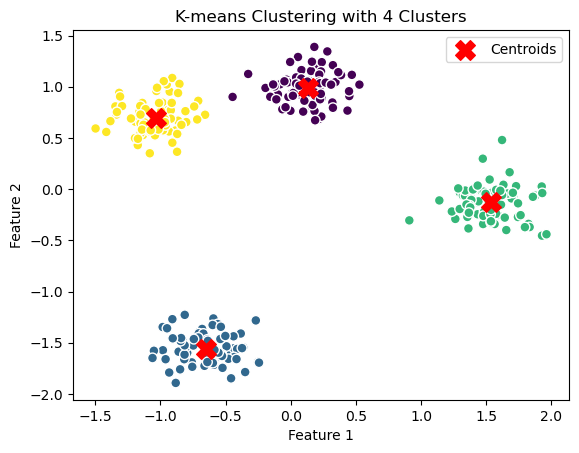

In [114]:
# TODO: Implement K-means with the number of clusters determined in the previous step
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample data (replace this with your own dataset)
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimal number of clusters determined from the elbow method (replace with your identified optimal value)
optimal_k = 4

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='w', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [115]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming kmeans_labels contains the cluster labels obtained from K-means clustering

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index (lower values indicate better clustering)
davies_bouldin_idx = davies_bouldin_score(X_scaled, kmeans_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")

# Calinski-Harabasz Index (higher values indicate better clustering)
calinski_harabasz_idx = calinski_harabasz_score(X_scaled, kmeans_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_idx}")


Silhouette Score: 0.797473988963273
Davies-Bouldin Index: 0.28110664690652637
Calinski-Harabasz Index: 3290.737330989358


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

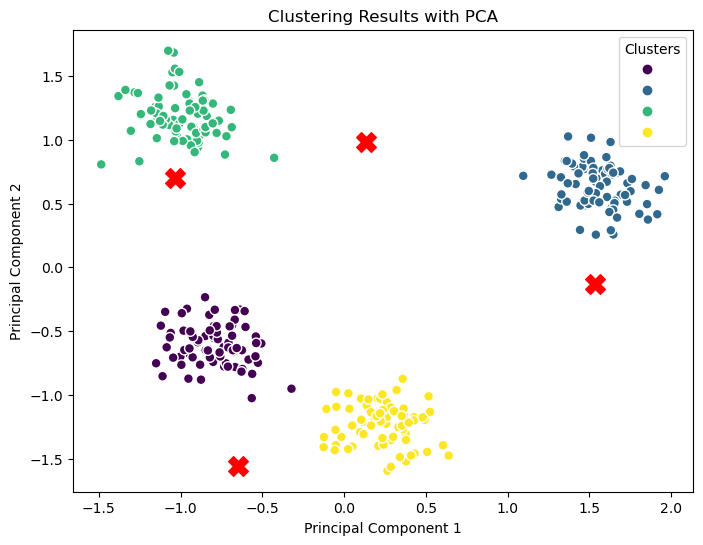

In [116]:
# TODO: Plot clustering results
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming kmeans_labels contains the cluster labels obtained from K-means clustering

# Apply PCA to the scaled data for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clustering results using PCA
plt.figure(figsize=(8, 6))

# Scatter plot colored by cluster labels
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='w', s=50)

# Mark centroids with red 'X' markers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add legend and labels
plt.legend(handles=scatter.legend_elements()[0], title='Clusters')
plt.title('Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

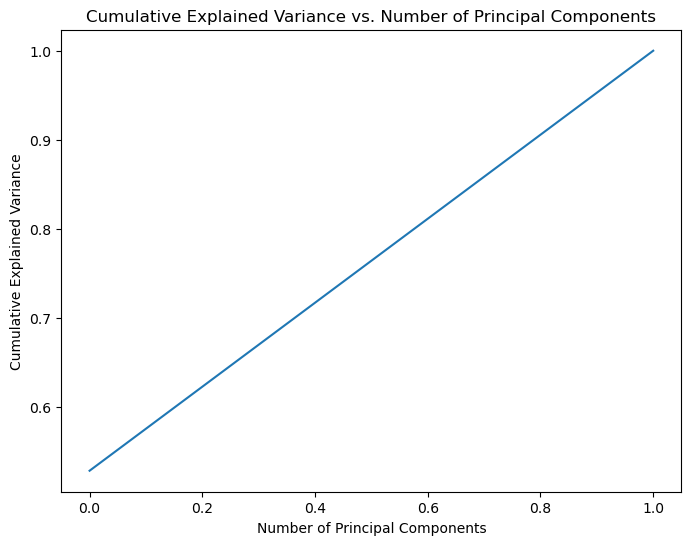

In [117]:
# TODO: Find the number of principal components using explained variance ratio
from sklearn.decomposition import PCA

# Assuming X_scaled is your scaled feature matrix

# Apply PCA to calculate the explained variance ratio
pca = PCA().fit(X_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [120]:
# TODO: Use PCA to transform the data
from sklearn.decomposition import PCA

# Assuming X_scaled is your scaled feature matrix

# Specify the desired number of principal components
n_components = 2  # Replace with the desired number

# Apply PCA to transform the data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# X_pca now contains the transformed data with the specified number of principal components


C:\Users\pamel\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pamel\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


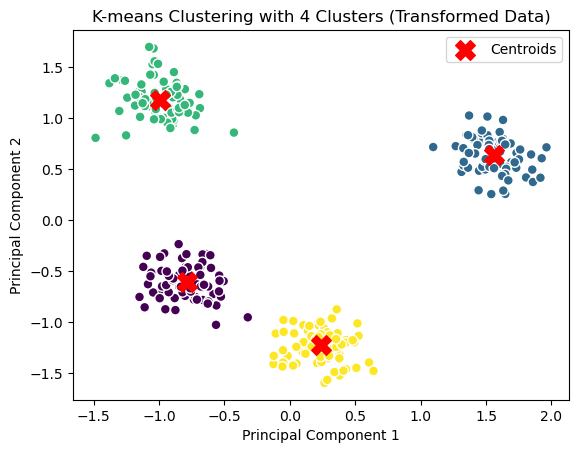

In [121]:
# TODO: Implement K-means with the transformed data
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_pca is the transformed data obtained from PCA

# Optimal number of clusters determined from the elbow method (replace with your identified optimal value)
optimal_k = 4

# Apply K-means clustering with the optimal number of clusters to the transformed data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='w', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means Clustering with {optimal_k} Clusters (Transformed Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



In [122]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming X_pca is the transformed data obtained from PCA
# Assuming kmeans_labels contains the cluster labels obtained from K-means clustering

# Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index (lower values indicate better clustering)
davies_bouldin_idx = davies_bouldin_score(X_pca, kmeans_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")

# Calinski-Harabasz Index (higher values indicate better clustering)
calinski_harabasz_idx = calinski_harabasz_score(X_pca, kmeans_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_idx}")


Silhouette Score: 0.7974739889632729
Davies-Bouldin Index: 0.2811066469065263
Calinski-Harabasz Index: 3290.7373309893565


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

Results for Steps 2 and 3:
                    Metric        Value
0         Silhouette Score     0.797474
1     Davies-Bouldin Index     0.281107
2  Calinski-Harabasz Index  3290.737331


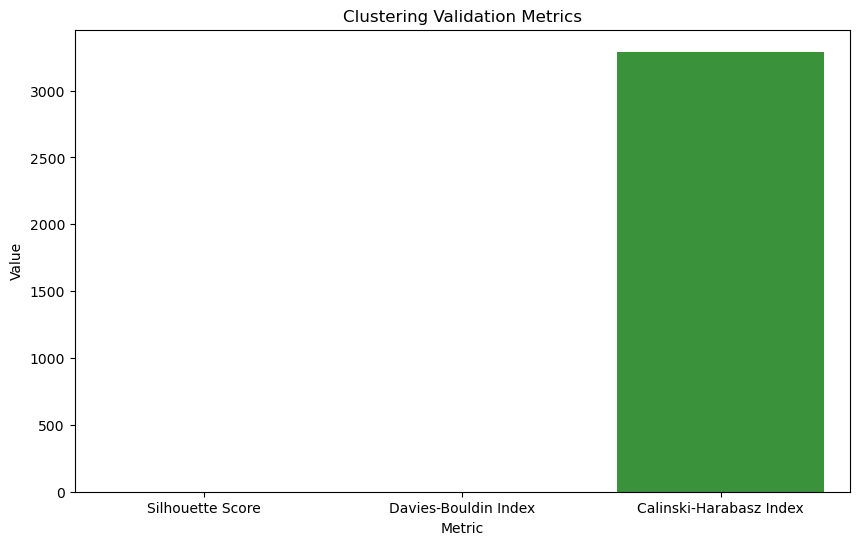

In [132]:
# TODO: Display results
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming silhouette_avg, davies_bouldin_idx, and calinski_harabasz_idx are your calculated metrics

# Create a dictionary for the metrics
metrics_dict = {
    "Metric": ["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"],
    "Value": [silhouette_avg, davies_bouldin_idx, calinski_harabasz_idx]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Print the DataFrame
print("Results for Steps 2 and 3:")
print(metrics_df)

# Visualize the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Value", data=metrics_df)
plt.title("Clustering Validation Metrics")
plt.show()


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
Yes it made sense as the orginal dataset had three class labels, so apparently it made sense that the optimal number of clusters was actaully three.
2. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
Yes, the plots actually have the same or similar distributions for the entire three classes.

3. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*
I Utilized two components to account for a minimum of 95% of the variance. Indeed, incorporating PCA yielded enhanced outcomes because the usual effect of mitigating the curse of dimensionality involves improving clustering accuracy by reducing the number of features.





*ANSWER HERE*

### Process Description (4 marks)

Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. Where did you source your code?
I sourced my code from the lecture notes, execises and examples given and also Google and Generative AI and StackOverflow
List of References
OpenAI. (2023). [Website]. https://www.openai.com
Google. (2023). [Website]. https://www.google.com
Stackoverflow. (2023).[Website]. https://stackoverflow.com/

2. In what order did you complete the steps?
I completed the steps sequentially begining from Step 1,2,3 and 4 and 5

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I prompted it in my words to generate ideas to write the code and understand the syntax behind the code. Yes I modifed the code many times because in most cases, it produced what I didn't need and in some cases, didn't include what I needed. So I modified it to add the missing part I needed and also the remove the unnecessary part which wasn't needed.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Yes at some point, I encountered some errors in my code, especially in step 3 and also when I tried to visualize the code. I figured out the error and debugged and after which I was able to get an output and visualize my results.

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
I like the fact that i was able to visualize the output and witnessing the coloured graphs which were so beautiful to the eyes. I found the assignment quite interesting and a bit challenging in the sense that it stimulated my brain during the visualization of the output and the bar codes and graphs.
